Data Source: https://www.kaggle.com/aljarah/xAPI-Edu-Data

Anggota:
*   064092100005 - ADINDA AYU AZZAHRA
*   064092100004 - ASYRIE CHAERANIE
*   064092100003 - SHAFA SALSABILA PRIBADI
*   064092100002 - STEVEN CHRIST PINANTYO ARWIDARASTO

Metode pendapatan data:
Dataset ini diambil dari Learning Management System (LMS) yang dinamakan Kalboard 360 yang menggunakan activity tracker tool yang dinamakan xAPI untuk memonitor progress pembelajaran seperti membaca website edukasi, dll

Dataset memiliki jumlah 480 rekord dengan 16 fitur yang diklasifikasikan sebagai fitur demografi, akademik serta fitur behavioral

Atribut Data:
1.   Gender - student's gender (nominal: 'Male' or 'Female’)
2.   Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
1.   Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
1.   Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
1.   Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)
2.   Section ID- classroom student belongs (nominal:’A’,’B’,’C’)
2.   Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)
2.   Semester- school year semester (nominal:’ First’,’ Second’)
1.   Parent responsible for student (nominal:’mom’,’father’)
2.   Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)
1.   Visited resources- how many times the student visits a course content(numeric:0-100)
1.   Viewing announcements-how many times the student checks the new announcements(numeric:0-100)
1.   Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
2.   Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)
2.   Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)
2.   Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

Tujuan: Melakukan pengklasifikasian rekord performa siswa kedalam tiga jenis skor akhir H(high), L(low), M(middle) berdasarkan keaktifan siswa serta progress pembelajaran yang dilakukan oleh siswa

# **Import lib yang akan digunakan**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Mengambil dataset**

In [ ]:
df = pd.read_csv("/content/xAPI-Edu-Data.csv")
df.head() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# **EDA**

> Mengembalikan nilai statistik dari data. Nilai yang dapat dilihat adalah penyebaran percentile dan nilai min max dari kolum dataframe untuk mengetahui besaran data tiap kolumnnya

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000




> Melakukan pengecekan korelasi setiap fieldnya. Jika dibandingkan dengan kolum discussion maka kolum annoucement view, visited resources dan raisehands memiliki relasi yang lebih signifikan



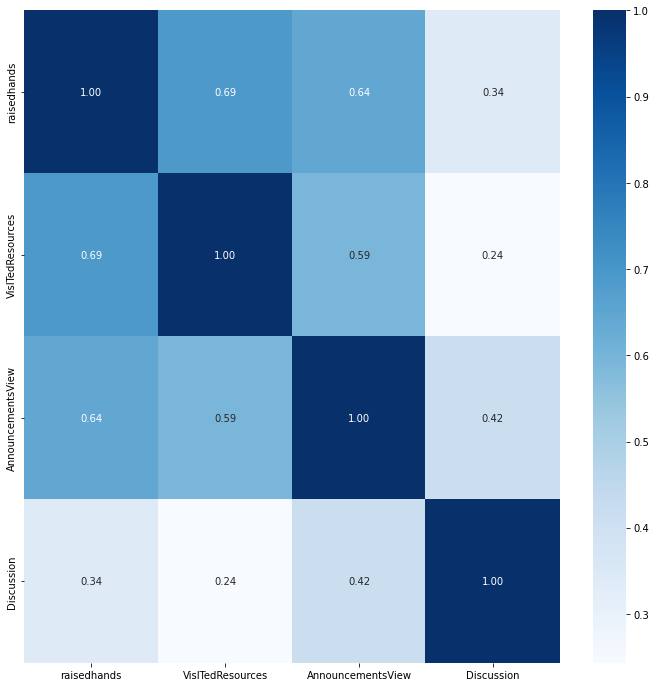

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

> Disini kami menampilkan distribusi jumlah rekord berdasarkan nilai class yang telah didefinisikan yaitu L(Low), M(Middle), H(High). Dari visualisasi data tersebut jumlah sample terbanyak memiliki nilai class menengah atau M dan diikuti dengan class H lalu class L. 

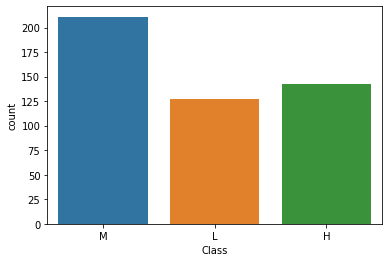

In [ ]:
sns.countplot(x = df['Class'])
plt.show()

> Disini kami menampilkan distribusi nilai class berdasarkan jenis jenjang pendidikannya yaitu lowerlevel, middleschool, highschool. Berdasarkan visualisasi data tersebut setiap jenjang pendidikan memiliki jumlah sample terbanyak dengan nilai class menengah. Untuk nilai class H maka hanya jenjang pendidikan middleschool dan highschool yang memiliki jumlah sample lebih banyak dibandingkan nilai class L

>Selain menampilkan distribusi sample dengan nilai classnya pada jenjang pendidikan, kami menampilkan distribusinya pada tiap jenjang kelasnya.

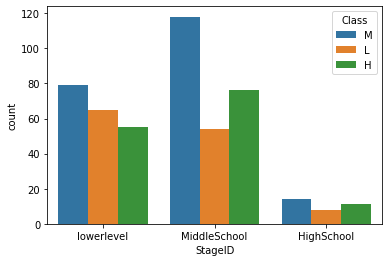

None


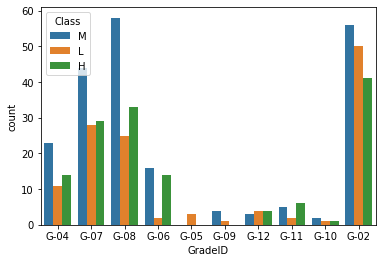

None


In [ ]:
for i in ['StageID', 'GradeID']:
  sns.countplot(x = i, data = df, hue = 'Class')
  print(plt.show())

> Disini kami memisahkan setiap kolum kedalam dua variable untuk menampung berdasarkan tipedatanya untuk mempermudah pengambilan data serta visualisasi data lebih lanjut.




In [ ]:
category = []
numeric = []
for i in df.columns:
  if(df[i].dtype == 'object'):
    category.append(i)
  else:
    numeric.append(i)

print("Kolum category berisi {}".format(category))
print("Kolum numeric berisi {}".format(numeric))

Kolum category berisi ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
Kolum numeric berisi ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']


> Disini kami melakukan visualisasi data untuk setiap kolum yang bertipe object atau kategori

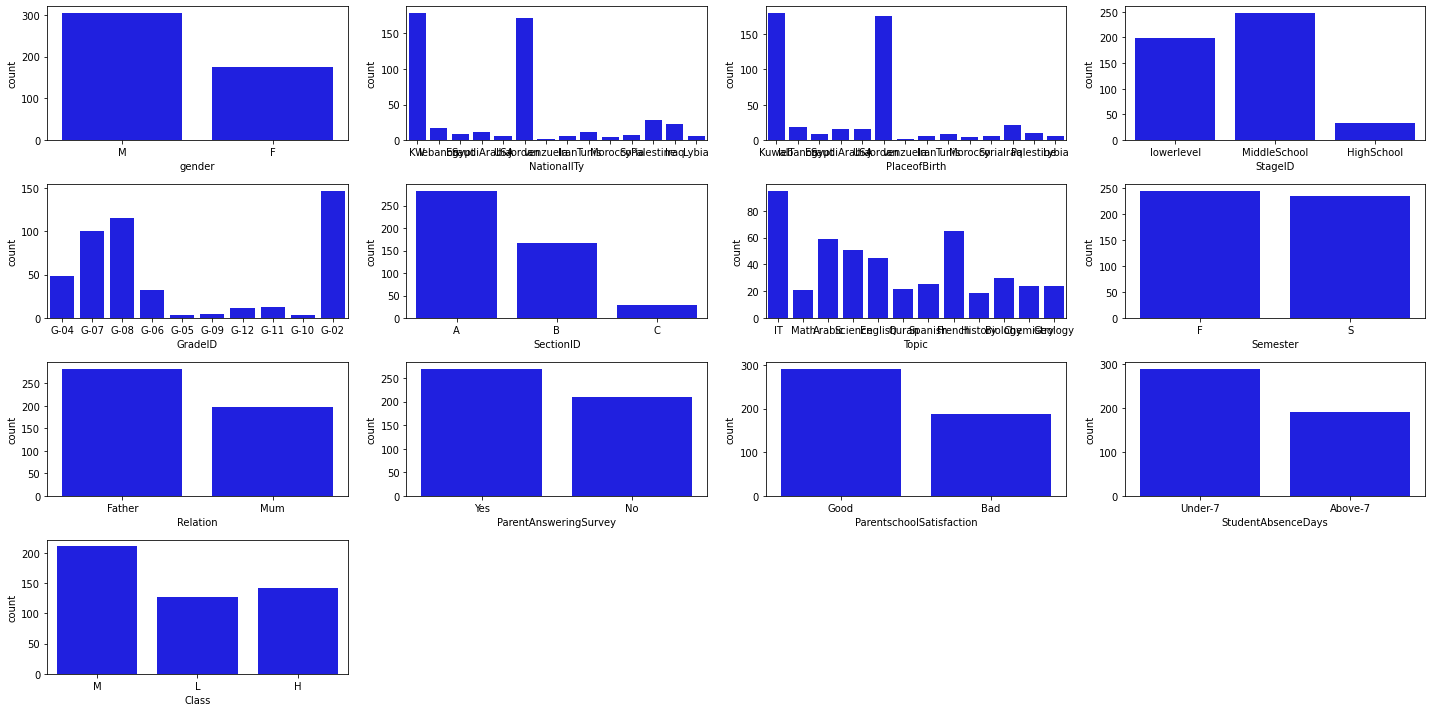

In [ ]:
plt.figure(figsize = (20,10))
for i in range (0, len(category)):
  plt.subplot(4, len(category)/3, i+1)
  sns.countplot(x = df[category[i]], color='blue')
  plt.tight_layout()

> Visualisasi kolum dengan tipedata numerik dengan menggunakan histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b81753850>,
      dtype=object)

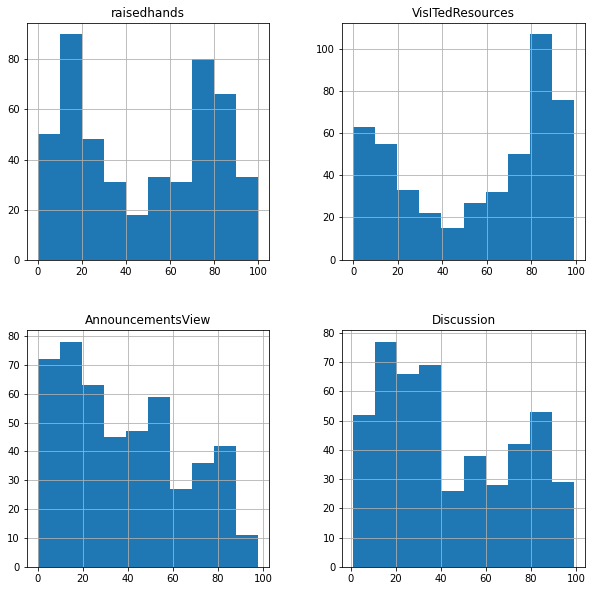

In [ ]:
df[numeric].hist(figsize=(10,10))

> Pengecekan adanya outlier atau tidak pada kolum yang dinyatakan dengan titik diluar interval garis boxplot. Dalam hal ini data yang diekstrak dapat dinyatakan bersih dari outlier yang membuat penulis tidak memerlukan untuk membersihkan data yang diolah dari outlier

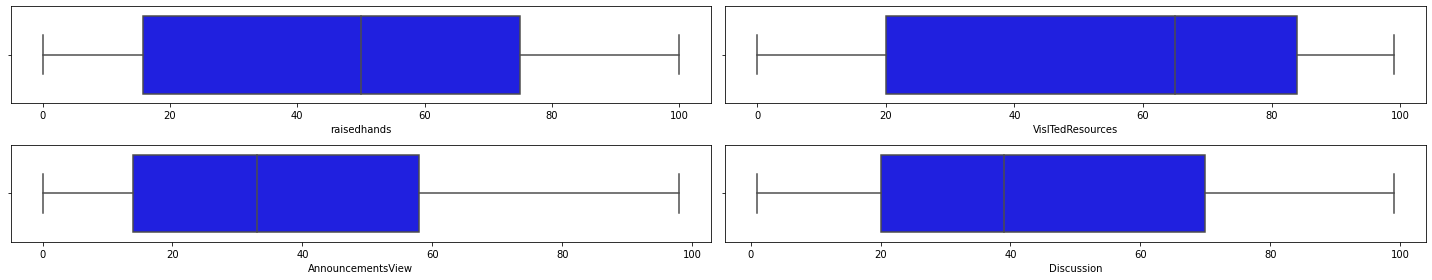

In [ ]:
plt.figure(figsize=(20,4))
for i in range (0, len(numeric)):
  plt.subplot(2, len(numeric)/2, i+1)
  sns.boxplot(x = df[numeric[i]],color='blue')
  plt.tight_layout()

# **Data Preprocessing**

> Dalam kasus ini, kami akan mengolah data siswa sekolah menengah

In [ ]:
df = df[df['StageID']=='MiddleSchool']

> Melakukan pengecekan tipa data untuk setiap kolum beserta nilai null yang ada.

> Berdasarkan deskripsi fungsi dibawah total rekord dari data yang telah diimport berjumlah 248 / 480 dengan nilai non-null untuk setiap kolum sebesar 248 / 480. Hal ini bermakna tidak adanya nilai null maka tidak memerlukan pembersihan data dengan melakukan penghapusan baris yang bernilai null


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 6 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    248 non-null    object
 1   NationalITy               248 non-null    object
 2   PlaceofBirth              248 non-null    object
 3   StageID                   248 non-null    object
 4   GradeID                   248 non-null    object
 5   SectionID                 248 non-null    object
 6   Topic                     248 non-null    object
 7   Semester                  248 non-null    object
 8   Relation                  248 non-null    object
 9   raisedhands               248 non-null    int64 
 10  VisITedResources          248 non-null    int64 
 11  AnnouncementsView         248 non-null    int64 
 12  Discussion                248 non-null    int64 
 13  ParentAnsweringSurvey     248 non-null    object
 14  ParentschoolSatisfaction  

> Menampilkan nilai unik dari kolum non-numerik. Jika kolum-kolum tersebut digunakan sebagai predictors atau nilai *explanatory* maka akan dijadikan sebagai kategori dengan dibuatkan variable dummy

In [ ]:
for i in df.columns:
  if(df[i].dtype != 'int64'):
    print("Kolum {} dengan nilai unik {}".format(i,df[i].unique()))

Kolum gender dengan nilai unik ['M' 'F']
Kolum NationalITy dengan nilai unik ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Tunis' 'Morocco'
 'Iran' 'Syria' 'Palestine' 'Iraq' 'Lybia']
Kolum PlaceofBirth dengan nilai unik ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Tunis' 'Morocco'
 'Iran' 'Syria' 'Iraq' 'Palestine' 'Lybia']
Kolum StageID dengan nilai unik ['MiddleSchool']
Kolum GradeID dengan nilai unik ['G-07' 'G-08' 'G-06']
Kolum SectionID dengan nilai unik ['A' 'B' 'C']
Kolum Topic dengan nilai unik ['Math' 'IT' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'Biology'
 'Chemistry' 'Geology' 'History']
Kolum Semester dengan nilai unik ['F' 'S']
Kolum Relation dengan nilai unik ['Father' 'Mum']
Kolum ParentAnsweringSurvey dengan nilai unik ['No' 'Yes']
Kolum ParentschoolSatisfaction dengan nilai unik ['Bad' 'Good']
Kolum StudentAbsenceDays dengan nilai unik ['Above-7' 'Under-7']
Kolum Class dengan nilai unik ['L' 'M' 'H']


> Pemilihan kolum yang akan digunakan akan menggunakan kolum pada list numeric dan ditambahkan dengan kolum class

In [ ]:
numeric.append('Class')
print("Kolum yang akan diolah adalah {}".format(numeric))

Kolum yang akan diolah adalah ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Class']


> Memasukkan data kolum kedalam variable data berdasarkan list kolum numeric

In [ ]:
data = df[numeric]
data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
6,35,12,0,17,L
7,50,10,15,22,M
8,12,21,16,50,M
9,70,80,25,70,M
10,50,88,30,80,H


> Dikarenakan tidak ada variable yang digunakan memiliki tipe data object maka pembuatan variable dummy tidak dibutuhkan. Maka proses dibawah ini tidak akan memberi perubahan pada dataframe yang akan digunakan




In [ ]:
category_dummy = []
for i in data.columns:
  try:
    if(data[i].dtype == 'object' and i != 'Class'):
      data[i] = pd.Categorical(data[i], categories=data[i].unique())
      category_dummy.append(i)
  except:
    print("Exception occured!")
try:
  data = pd.get_dummies(data, columns=category_dummy)
except:
  print("Exception occured!")

In [ ]:
data.shape

(248, 5)

> Berdasarkan interval dataset, kolum VisitedResources, AnnouncementView, dan Discussion memiliki nilai maksimal sebesar 100. Oleh karena itu, kami akan menggunakan MinMaxScaler dengan interval 0-100 pada kolum-kolum tersebut.

In [ ]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,248.000000,248.000000,248.000000,248.000000
mean,53.939516,58.568548,43.274194,45.875000
std,31.086278,31.658018,26.796078,27.835049
min,0.000000,0.000000,0.000000,1.000000
25%,22.000000,24.250000,19.000000,20.000000
50%,69.000000,73.000000,42.000000,41.000000
75%,80.000000,84.000000,64.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,100))

data[['VisITedResources','AnnouncementsView','Discussion']] = mm.fit_transform(data[['VisITedResources','AnnouncementsView','Discussion']])

> Selanjutnya, kolum atau fitur pada data yang telah diseleksi akan dipisahkan menjadi variable independen (x) dan variable dependen (y). Variable independen dalam hal ini yang akan dijadikan predictors sedangkan variable dependen akan dijadikan hasil prediksi data prediction

In [ ]:
x = data.iloc[:,:data.shape[1]-1]
y = data.iloc[:,data.shape[1]-1]
y.head()

6     L
7     M
8     M
9     M
10    H
Name: Class, dtype: object

> Dikarenakan variable y adalah kolum Class dengan tipe data object maka akan dikonversi menjadi nilai numerik dengan menggunakan library LabelEncoder. Alternatif metode yang dapat dilakukan adalah dengan menggunakan .replace()

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

> Kami menggunakan train_test_split untuk membagi data yang akan digunakan pada model training dan model testing sebesar 35%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 4)
(87, 4)
(161,)
(87,)


# **Model Building 1**

> Inisialisasi model untuk klasifikasi menggunakan [LogisticRegression]

> Disini akan dilakukan inisialisasi model *LogisticRegression* dengan variable *random_state* sebesar 0 untuk mencocokan dengan pengambilan sampel data secara acak pada pembagian distribusi data untuk pelatihan model dan pengujian model


In [ ]:
from sklearn.linear_model import LogisticRegression
#Inisialisasi
lr = LogisticRegression(random_state=0)

In [ ]:
#Fitting
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

> Disini akan dilakukan data testing dengan menggunakan variable test dimana prediksi akan dimasukan kedalam variable y_predict. Setelah itu, akan ditampilkan akurasi training dan testing

In [ ]:
#Data testing
y_lr_predict = lr.predict(x_test)

#Menampilkan nilai akurasi data training
print("Train Accuracy Score {}".format(lr.score(x_train, y_train)))
print("Test Accuracy Score {}".format(lr.score(x_test, y_test)))

Train Accuracy Score 0.6770186335403726
Test Accuracy Score 0.6551724137931034


> Menampilkan rata-rata performa klasifikasi

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report LR Test \n",classification_report(y_test, y_lr_predict),"\n==========================================================")

Classification Report LR Test 
               precision    recall  f1-score   support

           0       0.59      0.68      0.63        28
           1       0.85      0.65      0.73        17
           2       0.64      0.64      0.64        42

    accuracy                           0.66        87
   macro avg       0.69      0.66      0.67        87
weighted avg       0.67      0.66      0.66        87
 


> Kami menggunakan confusion matrix untuk mengetahui jumlah kesalahan dengan membandingkan hasil klasifikasi model dengan nilai aslinya. Berdasarkan confusion matrix jumlah total kesalahan 30 rekord dengan jumlah benar 57 untuk Logistic Regression

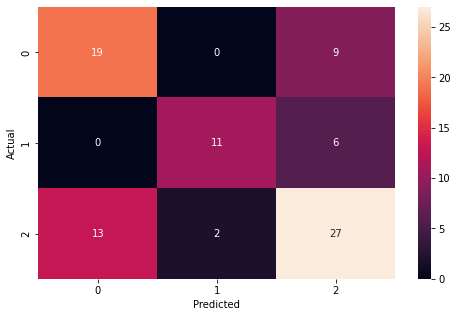

In [ ]:
from sklearn import metrics
for i in [y_lr_predict]:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(metrics.confusion_matrix(y_test, i), annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

> Untuk melakukan visualisasi *decision boundary* atau marginal keputusan yang dibentuk oleh model, maka kami mengubah dimensi dataframe menjadi 2 dimensi dengan menggunakan PCA (Principal Component Analysis) dan StandardScaler untuk menormalisasikan data.

> LR

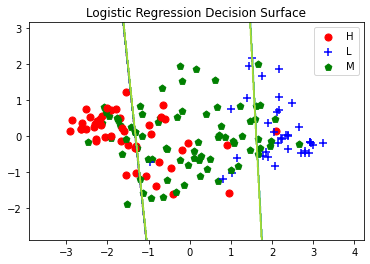

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()
pca = PCA(n_components=2).fit(ss.fit_transform(x_train))
pca_2d = pca.transform(ss.transform(x_train))
lr_pca = LogisticRegression(random_state=0).fit(pca_2d, y_train)

i = 0
for count in le.inverse_transform(y_train):
  if(count == 'H'):
    c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',s=50,marker='o')
  elif(count == 'L'):
    c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',s=50,marker='+')
  elif(count == 'M'):
    c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',s=50,marker='p')
  i+= 1

plt.legend([c1, c2, c3], ['H', 'L', 'M'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = lr_pca.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.title('Logistic Regression Decision Surface')
plt.axis('on')
plt.show()

# **Pengklasifikasian Data Baru 1**

> Disini kami akan membuat 2 data baru untuk diklasifikan hasilnya oleh model

In [ ]:
new_data = pd.DataFrame({
    'raisedhands' 	    : [80,22],
    'VisITedResources' 	: [90,20],
    'AnnouncementsView' :	[80,20],
    'Discussion'        : [33,44]
})

> Kami menggunakan CalibratedClassifierCV untuk mendapatkan probabilitas kemungkinan suatu rekord jatuh kedalam klasifikasi rekord tertentu. Perlu dicatat bahwa penggunaan CalibratedClassifierCV tidak dapat sepenuhnya akurat dikarenakan perbedaan metode yang digunakan dengan prediksi hasil oleh model.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

cc = CalibratedClassifierCV(base_estimator=lr).fit(x_train, y_train)

> Akan didapatkan hasil probabilitas hasil klasifikasi dari data baru

In [ ]:
new_data_pred_proba = cc.predict_proba(new_data)

> Dikarenakan variable new_data_pred_proba memiliki bentuk nested list. Oleh karena itu kami memisahkan setiap nilainya berdasarkan label nilai aslinya dan dibulatkan 3 decimal dibelakang koma.

In [ ]:
H_proba = []
L_proba = []
M_proba = []
for i in new_data_pred_proba:
  for j in range(0,len(i)):
    if(j==0):
      H_proba.append(round(i[j],3)*100)
    elif(j==1):
      L_proba.append(round(i[j],3)*100)
    else:
      M_proba.append(round(i[j],3)*100)

> Untuk nilai hasil klasifikasinya maka model akan melakukan prediksi biasa pada data baru. Hasil klasifikasi akan dimasukan ke kolum baru yaitu class_score dan pembuatan kolum probabilitas jatuhnya rekord kedalam suatu klasifikasi menggunakan list nilai yang telah dibuat sebelumnya.

In [ ]:
new_predict = lr.predict(new_data)
new_data['Class_score'] = le.inverse_transform(new_predict)
new_data['Probability_L'] = L_proba
new_data['Probability_M'] = M_proba
new_data['Probability_H'] = H_proba

> Maka didapatkannya hasil akhir rekord 1 dengan hasil klasifikasi score H dan rekord 2 dengan hasil klasifikasi skor L

In [ ]:
new_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class_score,Probability_L,Probability_M,Probability_H
0,80,90,80,33,H,2.8,47.5,49.6
1,22,20,20,44,M,46.4,47.3,6.3


# **Model Building 2**

> Disini kami akan menambahkan beberapa kolum feedback orang tua dalam pembelajaran model ini

**Data Preprocessing**

> Disini kami akan memilih kolum yang akan digunakan dan dimasukan kedalam variable data2

In [ ]:
column_selected = ['raisedhands','VisITedResources','AnnouncementsView','Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','Class']

In [ ]:
data2 = df[column_selected]
data2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,Class
6,35,12,0,17,No,Bad,L
7,50,10,15,22,Yes,Good,M
8,12,21,16,50,Yes,Good,M
9,70,80,25,70,Yes,Good,M
10,50,88,30,80,Yes,Good,H


> Penggunaan labelencoder akan dilakukan kembali untuk mengubah nilai string menjadi nilai numerik

In [ ]:
le = LabelEncoder()
data2['Class'] = le.fit_transform(data2['Class'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


> Pembuatan variable dummy untuk fitur yang memiliki tipe data kategorial dengan pengecualian kolum target yaitu Class

In [ ]:
category_dummy = []
for i in data2.columns:
  try:
    if(data2[i].dtype == 'object' and i != 'Class'):
      # data2[i] = pd.Categorical(data2[i], categories=data2[i].unique())
      category_dummy.append(i)
  except:
    print("Exception occured!")
try:
  data2 = pd.get_dummies(data2, columns=category_dummy)
except:
  print("Exception occured!")

In [ ]:
data2['Class_score'] = data2['Class']
data2 = data2.drop(['Class'],axis=1)
data2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,Class_score
6,35,12,0,17,1,0,1,0,1
7,50,10,15,22,0,1,0,1,2
8,12,21,16,50,0,1,0,1,2
9,70,80,25,70,0,1,0,1,2
10,50,88,30,80,0,1,0,1,0


> Pemisahan kolum fitur dan kolum target menggunakan iloc dan normalisasi nilai dengan MinMaxScaler

In [ ]:
x = data2.iloc[:,:data2.shape[1]-1]
y = data2.iloc[:,data2.shape[1]-1]

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,100))

x[['VisITedResources','AnnouncementsView','Discussion']] = mm.fit_transform(x[['VisITedResources','AnnouncementsView','Discussion']])
x.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,53.939516,59.160150,44.157340,45.790816,0.383065,0.616935,0.391129,0.608871
std,31.086278,31.977796,27.342936,28.403112,0.487117,0.487117,0.488990,0.488990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,24.494949,19.387755,19.387755,0.000000,0.000000,0.000000,0.000000
50%,69.000000,73.737374,42.857143,40.816327,0.000000,1.000000,0.000000,1.000000
75%,80.000000,84.848485,65.306122,70.408163,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000


> Disini kami akan membagi data kembali untuk model training dan model testing dengan data untuk testing sebesar 35% dan random_state = 0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 8)
(87, 8)
(161,)
(87,)


**Model Training dan Testing**

> Akan digunakan model yang sama seperti model pertama

In [ ]:
from sklearn.linear_model import LogisticRegression

#Inisialisasi
lr = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
#Fitting
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_lr_predict = lr.predict(x_test)
print("Accuracy model training {}".format(lr.score(x_train,y_train)))
print("Accuracy model testing {}".format(lr.score(x_test,y_test)))

Accuracy model training 0.7142857142857143
Accuracy model testing 0.632183908045977


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report Test \n",classification_report(y_test, y_lr_predict),"\n==========================================================")

Classification Report Test 
               precision    recall  f1-score   support

           0       0.56      0.64      0.60        28
           1       0.80      0.71      0.75        17
           2       0.62      0.60      0.61        42

    accuracy                           0.63        87
   macro avg       0.66      0.65      0.65        87
weighted avg       0.64      0.63      0.63        87
 


Berdasarkan *confusion matrix* dibawah ini, hasil pengujian model *Logistic Regression* mendapat kesalahan sebesar 32 rekord dengan jumlah benar sebesar 55

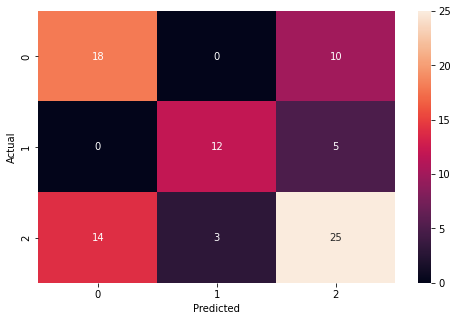

In [ ]:
from sklearn import metrics
for i in [y_lr_predict]:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(metrics.confusion_matrix(y_test, i), annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

# **Pengklasifikasian Data Baru 2**

> Disini akan dilakukannya percobaan klasifikasi terbaru dengan jumlah rekord 3

In [ ]:
new_data = pd.DataFrame({
    'raisedhands' 	    : [30,25,70],
    'VisITedResources' 	: [30,25,80],
    'AnnouncementsView' :	[35,25,90],
    'Discussion'        : [30,25,80],
    'ParentAnsweringSurvey_No':[1,0,1],
    'ParentAnsweringSurvey_Yes':[1,0,1],
    'ParentschoolSatisfaction_Bad':[0,0,1],
    'ParentschoolSatisfaction_Good':[1,0,1]
})

> Penggabungan hasil kedalam dataframe data baru

In [ ]:
new_data_pred = lr.predict(new_data)
new_data['Class_score'] = le.inverse_transform(new_data_pred)

In [ ]:
new_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,Class_score
0,30,30,35,30,1,1,0,1,M
1,25,25,25,25,0,0,0,0,L
2,70,80,90,80,1,1,1,1,H


# **RFE**

> Kami menggunakan *RFE (Recursive Feature Elimination)* untuk melakukan seleksi fitur terbaik yang memberikan dampak signifikan terhadap performa model.

In [ ]:
from sklearn.feature_selection import RFE

> Kami memilih kolum fitur dan target yang akan digunakan pada pembuatan model pertama ['raisedhands','VisITedResources','AnnouncementsView',\
'Discussion'] dan pembuatan model kedua ['ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']

In [ ]:
data_rfe = df[['raisedhands','VisITedResources','AnnouncementsView',\
'Discussion','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']]

> Kami menggunakan iloc untuk memisahkan fitur dan target dari dataframe.

In [ ]:
fitur = data_rfe.iloc[:,:data_rfe.shape[1]-1]
target= data_rfe.iloc[:,data_rfe.shape[1]-1]

> Dikarenakan *RFE* memerlukan tipe data numerik atau vektor, oleh karena itu dibutuhkannya transformasi data string menjadi numerik dengan menggunakan LabelEncoder

In [ ]:
target = le.fit_transform(target)
fitur['ParentAnsweringSurvey'] = le.fit_transform(fitur['ParentAnsweringSurvey'])
fitur['ParentschoolSatisfaction'] = le.fit_transform(fitur['ParentschoolSatisfaction'])
fitur['StudentAbsenceDays'] = le.fit_transform(fitur['StudentAbsenceDays'])

> Setelah transformasi data, kami melakukan uji korelasi dengan menggunakan *RFE* dan menampilkan hasil peringkat fitur.

> Mula-mula model perlu diinisialisasi dengan menggunakan LogisticRegression dan max_iter sebesar 1000 untuk menghindari peringatan iterasi, lalu melakukan fitting *dataset* terhadap pemilihan *RFE*.

In [ ]:
model = LogisticRegression(random_state=0, max_iter=1000)
rfe_model = RFE(model, n_features_to_select=4, step=1)
rfe_model = rfe_model.fit(fitur, target)
print("Pemilihan\n",rfe_model.support_)
print("Fitur Ranking\n",rfe_model.ranking_)
print("Fitur\n",fitur.columns)

Pemilihan
 [False  True False False  True  True  True]
Fitur Ranking
 [2 1 4 3 1 1 1]
Fitur
 Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')


> Berdasarkan hasil dari *RFE* 4 fitur, fitur yang berdampak secara signifikan merupakan VisitedResources, ParentAnsweringSurvey, ParentSchoolSatisfaction, dan StudentAbsenceDays

# **Referensi**

* https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

* https://towardsdatascience.com/visualizing-support-vector-machine-decision-boundary-69e7591dacea